# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

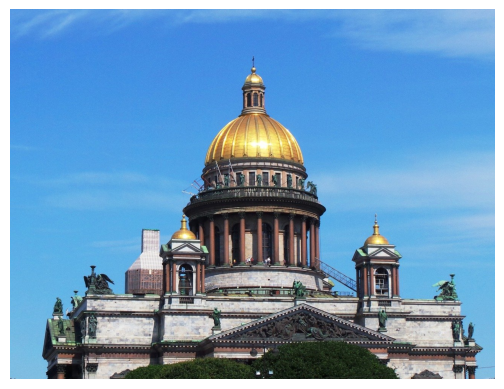

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import MiniBatchKMeans
import cv2
import numpy as np
import pandas as pd

random_state = 10


# Путь к изображению
img_path = '/content/drive/MyDrive/Colab Notebooks/Study/Machine-learning/ 9. Кластеризация, библиотеки в Python/Индивидуальное задание 9/spb_st_isaacs_2.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [ ]:
img.mean()

140.9997785391052

Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [ ]:
img = img.astype('float')
img /= 255
img.mean()

0.552940307996491

Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [ ]:
flat_img = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
km = MiniBatchKMeans(n_clusters=16, random_state=random_state)
km.fit(flat_img)
new_flat_img = []

for i in km.labels_:
    new_flat_img.append(km.cluster_centers_[i])

new_flat_img = np.array(new_flat_img)

new_flat_img.mean()

0.5538263185029294

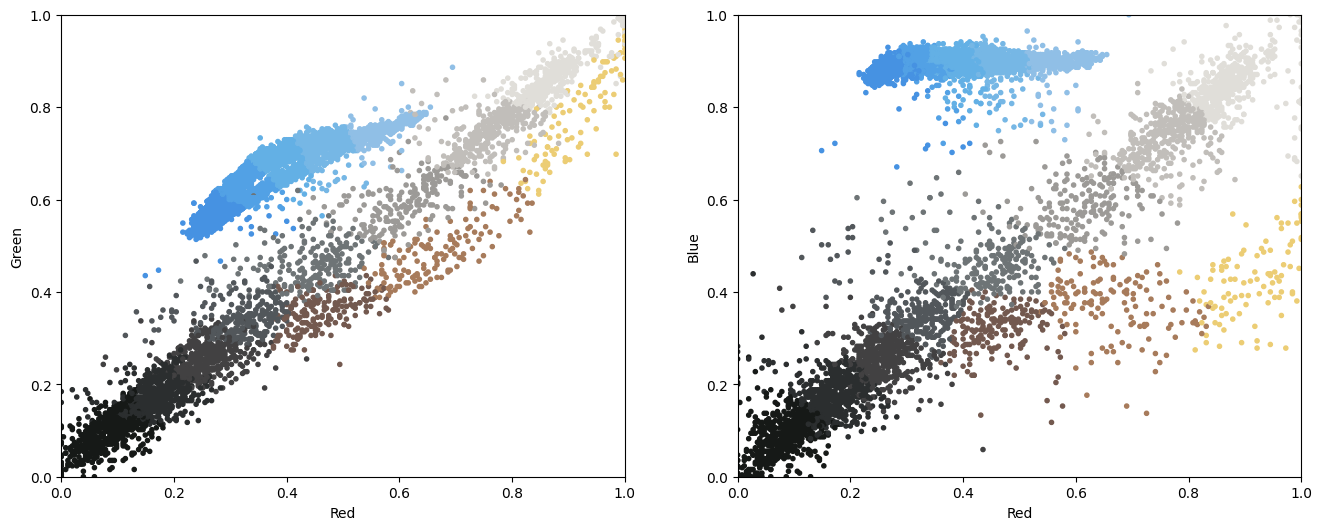

In [ ]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

plot_pixels(flat_img, new_flat_img)

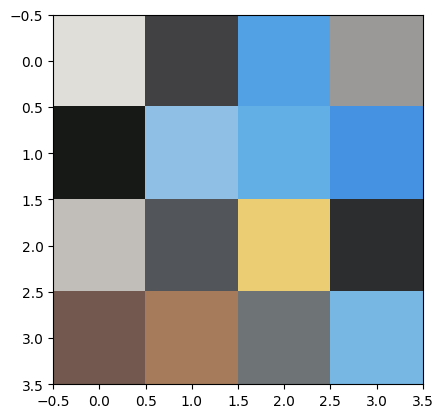

In [ ]:
sorted_colors = km.cluster_centers_.copy()
plt.imshow(sorted_colors.reshape((4, 4, 3)))

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


In [ ]:
# < ENTER YOUR CODE HERE > 

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [ ]:
# < ENTER YOUR CODE HERE > 

Выберите номер изображения, соответствующего палитре из $16$ цветов.

In [ ]:
# < ENTER YOUR CODE HERE > 

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

In [ ]:
# < ENTER YOUR CODE HERE > 

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

In [ ]:
# < ENTER YOUR CODE HERE > 